# Задание
Новое исследование на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый 
- использовать  метод логистической регрессии и попытаться подобрать лучшие гиперпараметры методом GridSearchCV
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний

In [25]:
# цель: классифицировать набор данных с помощью логистической регрессии, подобрав лучшие гиперпараметры методом GridSearchCV.

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

piz_df=pd.read_csv('https://raw.githubusercontent.com/GVicSt/DataSets/main/pizas_data_small.csv', sep='\t')

# я делал 4.3 первее поэтому я уже понял, что эта переменная должна быть 1 или 0
for i in range(len(piz_df)):
  piz_df.loc[i,'популярность'] = 1 if piz_df['популярность'][i] >= 0.7 else 0

piz_df

,имя,размер(см),популярность,эксклюзивность,цена(руб),калории,масса(грамм)
0,Margherita,30.5,1.0,0.2,749.70,250,350
1,Pepperoni,35.2,1.0,0.3,936.48,320,420
2,Hawaiian,28.0,1.0,0.1,819.89,280,380
3,Veggie Supreme,32.8,0.0,0.2,878.71,290,400
4,BBQ Chicken,33.5,1.0,0.3,982.88,350,460
5,Meat Lovers,36.0,1.0,0.4,1124.01,420,550
6,Four Cheese,29.7,0.0,0.1,787.51,280,390
7,Pesto Delight,31.2,0.0,0.2,852.21,310,420
8,Supreme,34.0,1.0,0.3,1055.12,380,500
9,Mediterranean,30.8,1.0,0.2,868.61,300,410


разделяю и сразу масштабирую набор данных

In [12]:
x = piz_df[['размер(см)','цена(руб)','эксклюзивность','масса(грамм)','калории']]
y = piz_df['популярность'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
y_test = pd.DataFrame(y_test).values.ravel()
y_train = pd.DataFrame(y_train).values.ravel()

scaler = StandardScaler().set_output(transform="pandas")
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)
print(f'размеры наборов:\n  x_train: {x_train.shape}\ty_train: {y_train.shape}\n  x_test: {x_test.shape}\ty_test: {y_test.shape}')

размеры наборов:
  x_train: (9, 5)	y_train: (9,)
  x_test: (6, 5)	y_test: (6,)


использовал лекционный материал.

In [20]:
def fit_eval(model, X_train, y_train, X_test, y_test, tf=False):
    if tf:
        model.fit(X_train, y_train)

    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    print("отчёт классификации:\n\t\t\tтренировочного набора:\n")
    print(metrics.classification_report(y_train,y_hat_train, digits=4))
    print("\n\t\t\tтестового набора:\n")
    print(metrics.classification_report(y_test,y_hat_test, digits=4))
    print("\nматрица конфузий и ROC & AUC график:")
    fig, axes = plt.subplots(ncols=2, figsize=(10,5))
    
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes[0])
    axes[0].set_title('Матрица конфузий')
    
    metrics.RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])
    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC График')
    
    plt.tight_layout()
    plt.show()

    print('параметры модели:\n')
    params = pd.DataFrame(pd.Series(model.get_params()))
    params.columns=['parameters']
    display(params)

использую GridSearchCV для подбора лучших параметров

In [26]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}

model = LogisticRegression(random_state=0)
grider = GridSearchCV(model, params, scoring='recall_macro')
grider.fit(scaled_x_train, y_train)
grider.best_params_

c:\Python\3.11.6\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter t

{'C': 0.001,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'}

отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     0.6667    1.0000    0.8000         4
         1.0     1.0000    0.6000    0.7500         5

    accuracy                         0.7778         9
   macro avg     0.8333    0.8000    0.7750         9
weighted avg     0.8519    0.7778    0.7722         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.5000    1.0000    0.6667         1
         1.0     1.0000    0.8000    0.8889         5

    accuracy                         0.8333         6
   macro avg     0.7500    0.9000    0.7778         6
weighted avg     0.9167    0.8333    0.8519         6


матрица конфузий и ROC & AUC график:


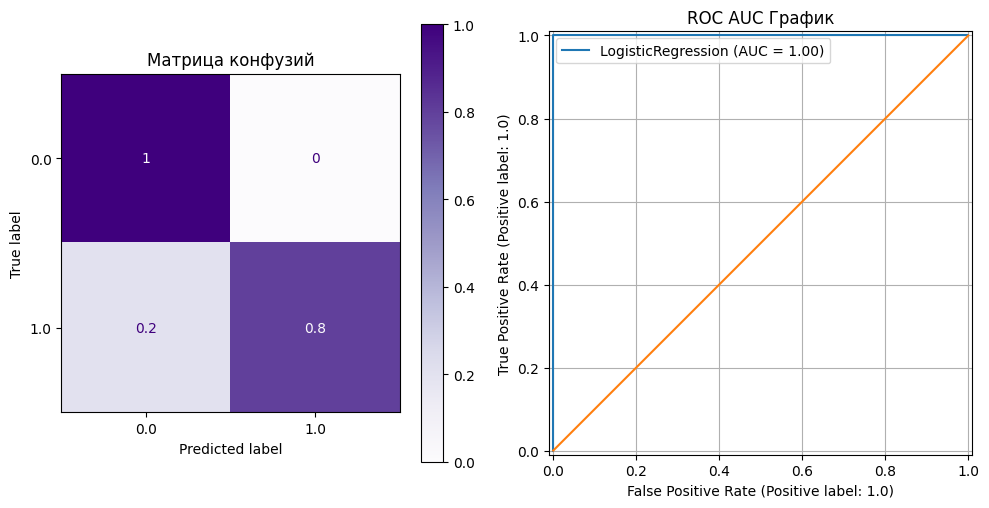

параметры модели:



,parameters
C,0.001
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [27]:
fit_eval(grider.best_estimator_, scaled_x_train, y_train, scaled_x_test, y_test, True)

тут скорее всего произошло небольшое переобучение модели, то есть она предсказывает 1 идеально но 0 может предсказать как 1 с шансом 50/50.
и ещё график нереалистичный, показывает 100% точности.

нужно что-то делать 😞😞😞

итог:
- подобрал гиперпараметры при помощи GridSearchCV
- классифицировал набор данных с помощью логистической регрессии
- ну точность ~0.75 неплоха но можно и лучше
- нужно что-то доработать